# Implementing basic ML Algorithms from scratch


----


### Objectives:

- Implement some basic ML Algorithms from scratch not using libraries exept for Numpy:
   - Part 1: Linear Regression
      - Simple LR
      - Multiple LR
      - Polynomial LR
   - Part 2: Logistic Regression
   - Part 3: Neural Network
  




### Context:

This notebook documents my first steps in Machine Learning, guided by my mentor Artem Yankov and the Machine Learning course by Andrew Ng on Coursera. 




-----


### Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import copy, os


## Part 2: Logistic Regression

### 2.1 Import Data


For this practice we will use data from a ML Coursera Course file.

In [12]:
X_train = []
y_train = []
with open('./data/ex2data1.txt','r') as file:
    for line in file:
        a,b,c = line.strip().split(',')
        X_train.append([float(a),float(b)])
        y_train.append(float(c))

X_train = np.array(X_train)
y_train = np.array(y_train)

#print(f'X_train.shape: {X_train.shape}, \nX_train[:2]: {X_train[:2]}')
#print(f'y_train.shape: {y_train.shape}, \ny_train[:2]: {y_train[:2]}')

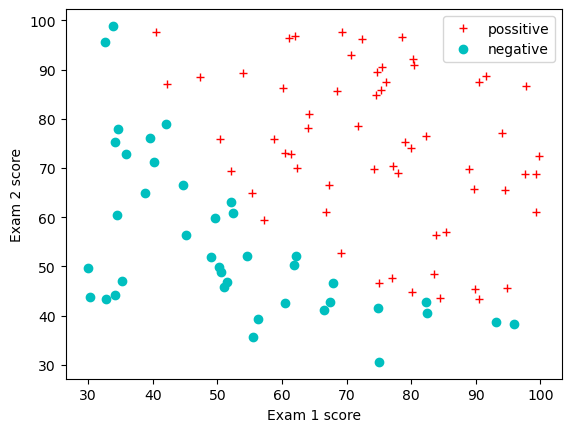

In [14]:
positive = y_train == 1
negative = y_train == 0
    
# Plot examples
plt.plot(X_train[positive, 0], X_train[positive, 1], 'r+', label='possitive')
plt.plot(X_train[negative, 0], X_train[negative, 1], 'co', label='negative')

plt.ylabel('Exam 2 score') 
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()


### 2.2 Defining: Cost, Derivatives and Gradient Descent functions

In [17]:
def sigmoid(z):
    """ Calculates the sigmoid function """
    g = 1.0 / (1.0 + np.exp(-z))
    return g
    

In [19]:
def compute_cost_LogR(X, y, w, b, lambda_):
    """ Calculates the J(w,b) cost with Regularizations"""    

    m,n = X.shape

    # Cost calculation: first term
    total_cost = 0.0
    for i in range(m):
        z_i = np.dot(w,X[i]) + b
        fwb_i = sigmoid(z_i)
        total_cost += -y[i]*np.log(fwb_i) - (1-y[i])*np.log(1-fwb_i)
    total_cost = total_cost / m
    
    # Cost colaculation: regularization term
    cost_reg = 0.0
    for j in range(n):
        cost_reg += w[j]**2
    cost_reg = (lambda_/(2*m))*cost_reg

    # Sum both terms
    total_cost = total_cost + cost_reg

    return total_cost


In [21]:
def compute_gradient_LogR(X, y, w, b, lambda_):
    """ Calculates gredient derivatives for Logistic Regression."""
    
    m, n = X.shape
    dj_dw = 0.0
    dj_db = 0.0
    err = 0.0
    Jwb = 0.0

    # Calculate the derivatives
    for i in range(m):
        z_i = np.dot(w,X[i]) + b
        fwb = sigmoid(z_i)
        err = fwb - y[i]
        dj_dw += err*X[i]
        dj_db += err

    # Regularization
    dj_dw += lambda_*w
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    return (dj_dw, dj_db)   
    

In [23]:
def gradient_descent_LogR(X, y, w_init, b_init, lr, steps, lambda_, verbose=True):
    """ Follows the gradient descent to fit w and b."""
    
    w = w_init
    b = b_init
    wbj_hist = []  # a list that keep track of each w,b and J values
        
    for i in range(steps):
        dj_dw, dj_db = compute_gradient_LogR(X, y, w, b, lambda_) 
        Jwb = compute_cost_LogR(X, y, w, b, lambda_)
        wbj_hist.append([w, b, Jwb])
        
        if verbose:
            # Print intermediate values
            if i % int(steps/10) == 0:
                # Create a formatted string for the w array
                formatted_w = ', '.join([f'{wj:8.4f}' for wj in w])
                # Print the result
                print(f'Step {i}: w = [{formatted_w}], b = {b:8.4f}, Jwb = {Jwb:8.4f}')
                
        w = w - lr * dj_dw
        b = b - lr * dj_db
                
    return (w, b, wbj_hist)
    

In [25]:
def predict(X, w, b):
    """ Predict whether the label is 0 or 1 using learned logistic regression parameters w. """

    m, n = X.shape
    pred = np.zeros(m)
    threshold = 0.5
    p = np.zeros(m)

    for i in range(m):
        z_wb = sigmoid(np.dot(w,X[i])+b)

        p[i] = 0.0 if z_wb < threshold else 1.0

    return p


### 2.3 Compute Gradient Descent for Logistic Regression

In [28]:
w_init = np.zeros(X_train.shape[1])
b_init = 0.0
lr = 0.0003
steps = 1000
lambda_ = 1
w_final_1, b_final_1, wbj_hist_1 = gradient_descent_LogR(X_train, y_train, w_init, b_init, lr, steps, lambda_, verbose=True)
print(60*"-")
formatted_w = ', '.join([f'{wj:8.4f}' for wj in w_final_1])
print(f'w: {formatted_w}\nb: {b_final_1:8.4f}\nCost J: {wbj_hist_1[-1][-1]:8.4f}')


Step 0: w = [  0.0000,   0.0000], b =   0.0000, Jwb =   0.6931
Step 100: w = [  0.0100,   0.0009], b =  -0.0020, Jwb =   0.6297
Step 200: w = [  0.0104,   0.0005], b =  -0.0041, Jwb =   0.6295
Step 300: w = [  0.0105,   0.0005], b =  -0.0062, Jwb =   0.6294
Step 400: w = [  0.0105,   0.0005], b =  -0.0083, Jwb =   0.6292
Step 500: w = [  0.0105,   0.0005], b =  -0.0104, Jwb =   0.6291
Step 600: w = [  0.0105,   0.0005], b =  -0.0125, Jwb =   0.6289
Step 700: w = [  0.0105,   0.0006], b =  -0.0146, Jwb =   0.6288
Step 800: w = [  0.0105,   0.0006], b =  -0.0167, Jwb =   0.6287
Step 900: w = [  0.0106,   0.0006], b =  -0.0188, Jwb =   0.6285
------------------------------------------------------------
w:   0.0106,   0.0006
b:  -0.0208
Cost J:   0.6284


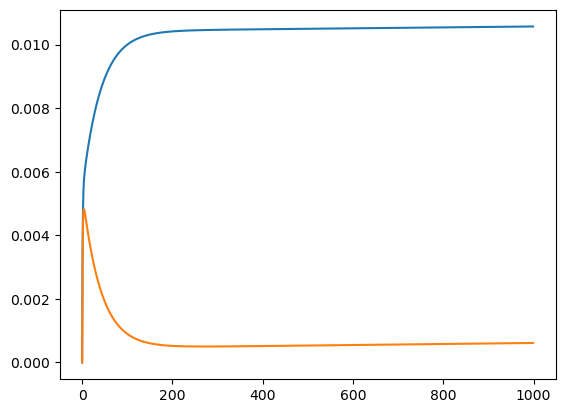

In [29]:
w_hist_1, b_hist_1, j_hist_1 = map(list,zip(*wbj_hist_1))
# same as:
# w_hist_1 = [row[0] for row in wbj_hist_1]
# b_hist_2 = [row[1] for row in wbj_hist_1]
# j_hist_1 = [row[2] for row in wbj_hist_1]

plt.plot(range(steps),w_hist_1[:steps])
plt.show()


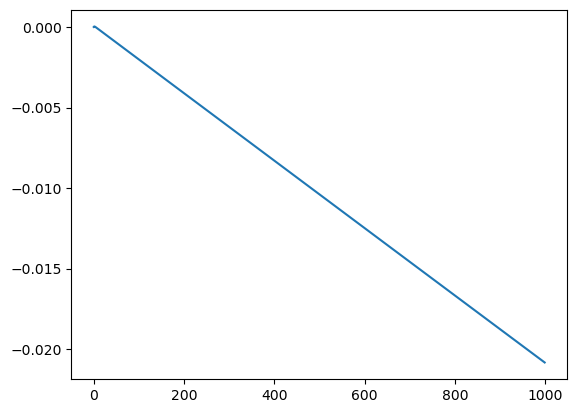

In [30]:
plt.plot(range(steps),b_hist_1[:steps])
plt.show()

### Plot the boundary line

In [32]:
y_pred_1 = predict(X_train, w_final_1, b_final_1)
print('Train Accuracy: %f'%(np.mean(y_pred_1 == y_train) * 100))




Train Accuracy: 60.000000


Number of positives: 60
Number of negatives: 40


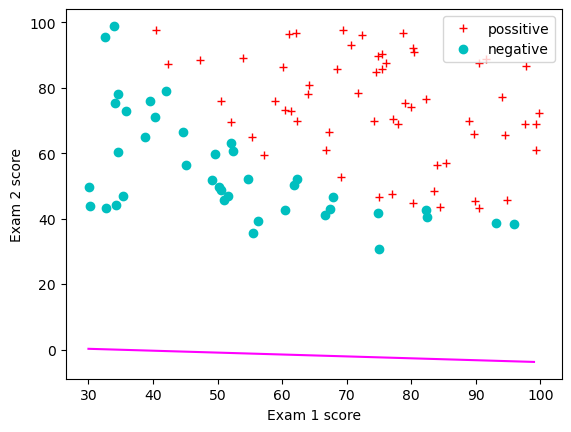

In [35]:
positive = y_train == 1
negative = y_train == 0
print(f'Number of positives: {positive.sum()}')
print(f'Number of negatives: {negative.sum()}')

boundary_x = [x for x in range(30,100)]
boundary_y = [(-1*w_final_1[1]*x - b_final_1)/w_final_1[0] for x in boundary_x]


# Plot examples
plt.plot(X_train[positive, 0], X_train[positive, 1], 'r+', label='possitive')
plt.plot(X_train[negative, 0], X_train[negative, 1], 'co', label='negative')
plt.plot(boundary_x,boundary_y, color='magenta')
plt.ylabel('Exam 2 score') 
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

### The model is not performing as expected, let's scale the features and compare results:

In [40]:
X_train_zn = (X_train - X_train.mean())/X_train.std()

In [42]:
w_init = np.zeros(X_train_zn.shape[1])
b_init = 0.0
lr = 0.1
steps = 1000
lambda_ = 1
w_final_2, b_final_2, wbj_hist_2 = gradient_descent_LogR(X_train_zn, y_train, w_init, b_init, lr, steps, lambda_, verbose=True)
print(60*"-")
formatted_w = ', '.join([f'{wj:8.4f}' for wj in w_final_2])
print(f'w: {formatted_w}\nb: {b_final_2:8.4f}\nCost J: {wbj_hist_2[-1][-1]:8.4f}')


Step 0: w = [  0.0000,   0.0000], b =   0.0000, Jwb =   0.6931
Step 100: w = [  1.2258,   1.1203], b =   0.4654, Jwb =   0.3316
Step 200: w = [  1.6141,   1.5028], b =   0.6504, Jwb =   0.2972
Step 300: w = [  1.8229,   1.7120], b =   0.7615, Jwb =   0.2870
Step 400: w = [  1.9523,   1.8426], b =   0.8341, Jwb =   0.2831
Step 500: w = [  2.0379,   1.9292], b =   0.8834, Jwb =   0.2813
Step 600: w = [  2.0964,   1.9885], b =   0.9177, Jwb =   0.2805
Step 700: w = [  2.1373,   2.0301], b =   0.9418, Jwb =   0.2801
Step 800: w = [  2.1662,   2.0595], b =   0.9590, Jwb =   0.2799
Step 900: w = [  2.1869,   2.0805], b =   0.9714, Jwb =   0.2798
------------------------------------------------------------
w:   2.2018,   2.0956
b:   0.9803
Cost J:   0.2798


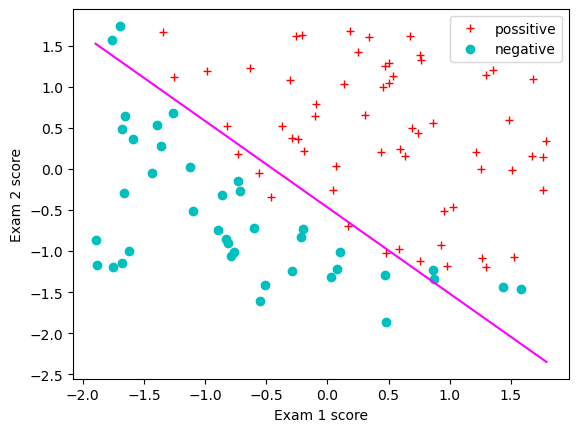

In [43]:
positive = y_train == 1
negative = y_train == 0
X_min = X_train_zn.min()
X_max = X_train_zn.max()
# Create an array of 100 values between x_min and x_max
boundary_x = np.linspace(X_min, X_max, 100)
boundary_y = [(-1*w_final_2[0]*x - b_final_2)/w_final_2[1] for x in boundary_x]

# Plot examples
plt.plot(X_train_zn[positive, 0], X_train_zn[positive, 1], 'r+', label='possitive')
plt.plot(X_train_zn[negative, 0], X_train_zn[negative, 1], 'co', label='negative')
plt.plot(boundary_x,boundary_y, color='magenta')
plt.ylabel('Exam 2 score') 
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

In [44]:
y_pred_2 = predict(X_train_zn, w_final_2, b_final_2)
print('Train Accuracy: %f'%(np.mean(y_pred_2 == y_train) * 100))

Train Accuracy: 89.000000


## The importance of Scaling !!!

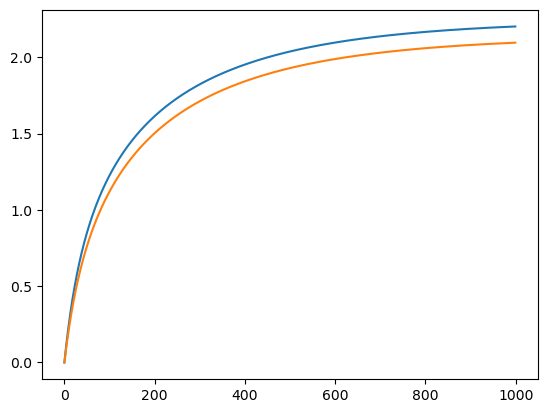

In [46]:
w_hist_2, b_hist_2, j_hist_2 = map(list,zip(*wbj_hist_2))
plt.plot(range(steps),w_hist_2[:steps])
plt.show()


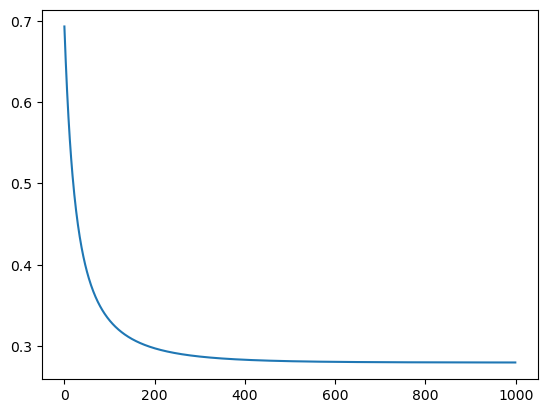

In [48]:
plt.plot(range(steps),j_hist_2[:steps])
plt.show()

### Let's add more parameters: Feature Mapping
One way to fit the data better is to create more features from each data point.



In [53]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'r+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'co', label=neg_label)


def map_feature(X1, X2, degree=2):
    """
    Feature mapping function to polynomial features
    This version added the 'degree' as a parameter
    """
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)


def plot_decision_boundary(w, b, X, y, degree=2, map=False):
    # Credit to dibgerge on Github for this plotting code
    """This version added the 'degree' as a parameter"""
        
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-2, 2, 50)
        v = np.linspace(-2, 2, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                feature_vector = map_feature(u[i], v[j], degree)
                z[i, j] = sigmoid(np.dot(feature_vector, w) + b).item()  # .item(): ensures scalar
                                
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot decision boundary at z = 0.5
        plt.contour(u, v, z, levels=[0.5], colors="g")

        # Plot filled contour map if boolean 'map' argument is set
        if map:
            # Plot filled contour map
            contour_filled = plt.contourf(u, v, z, levels=np.linspace(0, 1, 100), cmap="RdBu", alpha=0.6)
            # Plot contour lines
            contour_lines = plt.contour(u, v, z, levels=np.linspace(0, 1, 10), colors="k")
            # Add labels to the contour lines
            plt.clabel(contour_lines, inline=True, fontsize=8, fmt="%.2f")

            
        



In [56]:
degree = 6  # default:2
X_mapped = map_feature(X_train_zn[:, 0], X_train_zn[:, 1], degree)
w_init = np.zeros(X_mapped.shape[1])
b_init = 0.0
lr = 0.1
steps = 1000
lambda_ = 0.0
w_final_mapped, b_final_mapped, wbj_hist_mapped = gradient_descent_LogR(X_mapped, y_train, w_init, b_init, lr, steps, lambda_, verbose=False)
print(60*"-")
formatted_w = ', '.join([f'{wj:8.4f}' for wj in w_final_mapped])
print(f'w: {formatted_w}\nb: {b_final_mapped:8.4f}\nCost J: {wbj_hist_mapped[-1][-1]:8.4f}')

------------------------------------------------------------
w:   1.5811,   1.3665,   0.3673,  -1.3722,   0.4901,   1.0951,   0.3685,   0.6886,   0.8852,  -0.0366,  -0.6453,   0.3278,  -0.7809,   0.1378,   1.0029,   0.4389,   0.0652,   0.4210,   0.1985,   1.2926,  -0.5939,  -0.0031,  -0.2275,   0.0273,  -0.2128,   0.0054,  -0.6401
b:   1.9501
Cost J:   0.0719


Text(0.5, 1.0, 'w parameters (27 weights)')

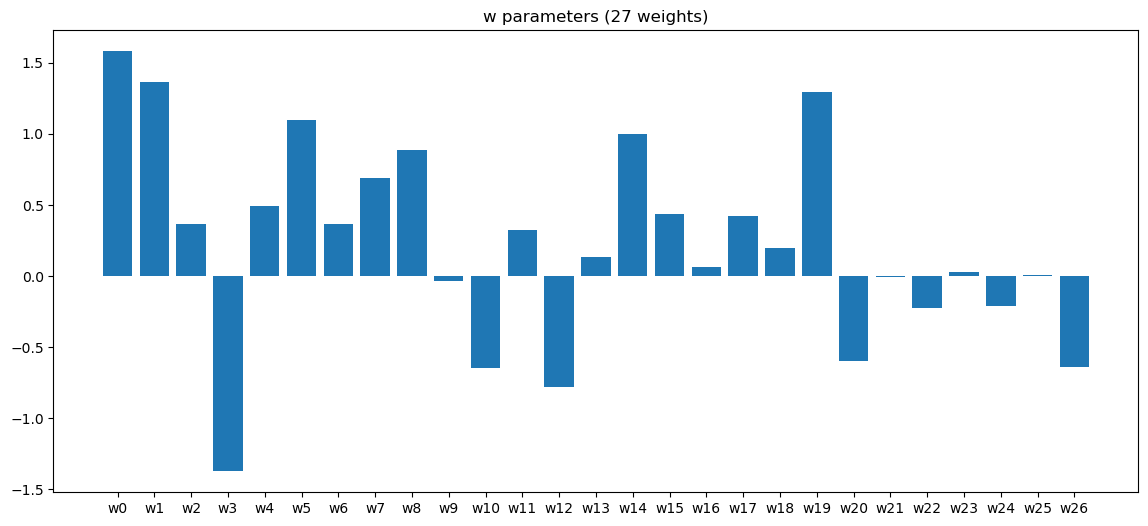

In [57]:
indices = ["w"+str(i) for i in range(X_mapped.shape[1])]
plt.figure(figsize=(14, 6)) 
plt.bar(indices,w_final_mapped)
plt.title("w parameters (" + str(X_mapped.shape[1]) + " weights)")


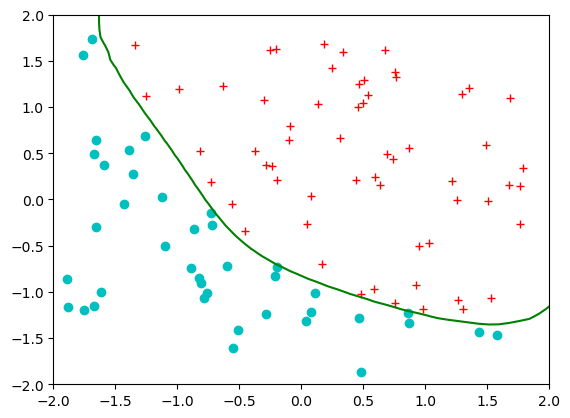

In [58]:
plot_decision_boundary(w_final_mapped, b_final_mapped, X_mapped, y_train, degree)
# # Set the y-axis label
# #plt.ylabel('') 
# # Set the x-axis label
# #plt.xlabel('')
# plt.legend(loc="upper right")
# plt.show()

In [59]:
y_pred_mapped = predict(X_mapped, w_final_mapped, b_final_mapped)
print('Train Accuracy: %f'%(np.mean(y_pred_mapped == y_train) * 100))

Train Accuracy: 100.000000


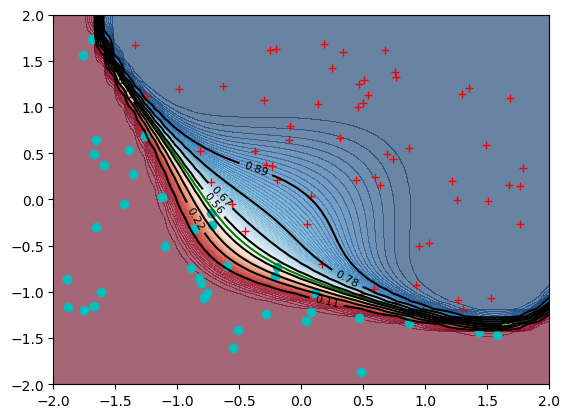

In [60]:
plot_decision_boundary(w_final_mapped, b_final_mapped, X_mapped, y_train, degree, map=True)

With the initial conditions:
degree=6, w_init = np.zeros(X_mapped.shape[1]), b_init = 0.0, lr = 0.1, steps = 1000, lambda_ = 0

**Note**: The 100% accuracy observed in this result comes from a Coursera dataset, which is relatively simple and well-structured. This may not reflect real-world performance, where models often face more complex and noisy data. High accuracy in such cases can indicate overfitting, so caution is needed when generalizing these results to broader datasets.

----

# UNITARY TEST

#### As a test for the previously implemented algorithms, we ran some unit tests to verify if we achieved the same results as the C1_W3 'Logistic Regression' Test Lab.

In [69]:
m, n = X_train.shape
# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost_LogR(X_train, y_train, initial_w, initial_b, 0)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [70]:
# Compute and display cost with non-zero w and b
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost_LogR(X_train, y_train, test_w, test_b,0)

print('Cost at test w and b (non-zeros): {:.3f}'.format(cost))


Cost at test w and b (non-zeros): 0.218


In [72]:
initial_w = np.zeros(n)
initial_b = 0.

dj_dw, dj_db = compute_gradient_LogR(X_train, y_train, initial_w, initial_b, 0)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):-0.1
dj_dw at initial w and b (zeros):[-12.00921658929115, -11.262842205513591]


In [76]:
# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_dw, dj_db  = compute_gradient_LogR(X_train, y_train, test_w, test_b, 0)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())


dj_db at test w and b: -0.5999999999991071
dj_dw at test w and b: [-44.831353617873795, -44.37384124953978]


In [78]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001
                    
w,b, J_history = gradient_descent_LogR(X_train ,y_train, initial_w, initial_b, alpha, iterations, 0, verbose=True)
                                   

Step 0: w = [ -0.0008,   0.0022], b =  -8.0000, Jwb =   4.7398
Step 1000: w = [  0.0699,   0.0635], b =  -8.0183, Jwb =   0.3051
Step 2000: w = [  0.0701,   0.0636], b =  -8.0375, Jwb =   0.3047
Step 3000: w = [  0.0702,   0.0638], b =  -8.0566, Jwb =   0.3044
Step 4000: w = [  0.0704,   0.0639], b =  -8.0757, Jwb =   0.3040
Step 5000: w = [  0.0705,   0.0641], b =  -8.0946, Jwb =   0.3036
Step 6000: w = [  0.0707,   0.0642], b =  -8.1136, Jwb =   0.3033
Step 7000: w = [  0.0708,   0.0644], b =  -8.1324, Jwb =   0.3029
Step 8000: w = [  0.0710,   0.0645], b =  -8.1512, Jwb =   0.3026
Step 9000: w = [  0.0711,   0.0647], b =  -8.1699, Jwb =   0.3022


In [79]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')


Output of predict: shape (4,), value [0. 1. 1. 1.]


In [80]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000
